## PEAK 3 Y24 phosphorylation

model PEAK3

J0: PEAK3_Y24 -> PEAK3_Y24P; J0_Vmax*PEAK3_Y24/(J0_Km + PEAK3_Y24)
J1: PEAK3_Y24P -> PEAK3_Y24; J1_Vmax*PEAK3_Y24P/(J1_Km + PEAK3_Y24P)

# State variables in the system
PEAK3_Y24=100
PEAK3_Y24P=0

# Parameters in the system
J0_Km=100
J0_Vmax=10
J1_Km=100
J1_Vmax=10

end


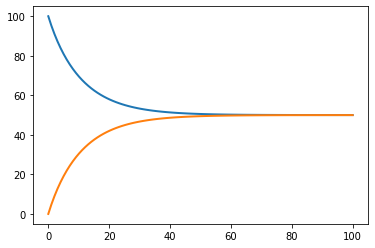

In [5]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *

model = ModelBuilder('PEAK3')
model.add_reaction(Reaction(michaelis_menten, ('PEAK3_Y24',), ('PEAK3_Y24P',)))
model.add_reaction(Reaction(michaelis_menten, ('PEAK3_Y24P',), ('PEAK3_Y24',), reactant_values=0, product_values=100))

print(model.get_antimony_model())

model.simulate(0, 100, 100)
model.plot()


Antimony model compiled without error


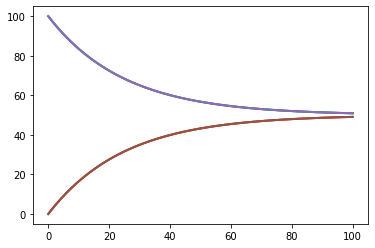

['P3C_Shc', 'P3C_ShcBound', 'P3C_ASAP1', 'P3C_ASAP1Bound', 'P3C_GRB2', 'P3C_GRB2Bound', '[P3C_Shc]', '[P3C_ShcBound]', '[P3C_ASAP1]', '[P3C_ASAP1Bound]', '[P3C_GRB2]', '[P3C_GRB2Bound]', 'default_compartment', 'A_ka', 'A_kd', 'B_ka', 'B_kd', 'C_ka', 'C_kd', 'A_J0', 'A_J1', 'B_J0', 'B_J1', 'C_J0', 'C_J1', 'init([P3C_Shc])', 'init([P3C_ShcBound])', 'init([P3C_ASAP1])', 'init([P3C_ASAP1Bound])', 'init([P3C_GRB2])', 'init([P3C_GRB2Bound])', 'init(P3C_Shc)', 'init(P3C_ShcBound)', 'init(P3C_ASAP1)', 'init(P3C_ASAP1Bound)', 'init(P3C_GRB2)', 'init(P3C_GRB2Bound)', 'init(default_compartment)', 'init(A_ka)', 'init(A_kd)', 'init(B_ka)', 'init(B_kd)', 'init(C_ka)', 'init(C_kd)', "P3C_Shc'", "P3C_ShcBound'", "P3C_ASAP1'", "P3C_ASAP1Bound'", "P3C_GRB2'", "P3C_GRB2Bound'", "[P3C_Shc]'", "[P3C_ShcBound]'", "[P3C_ASAP1]'", "[P3C_ASAP1Bound]'", "[P3C_GRB2]'", "[P3C_GRB2Bound]'", 'stoich(P3C_Shc, A_J0)', 'stoich(P3C_Shc, A_J1)', 'stoich(P3C_ShcBound, A_J0)', 'stoich(P3C_ShcBound, A_J1)', 'stoich(P3C_ASA

In [17]:
# use antimony's default modularity to create model 

import antimony
import roadrunner
import matplotlib.pyplot as plt

ant_model = """

model MichaelisMenten(F, B)
    J0:F -> B; Vmf * F / (Kmf + F)
    J1:B -> F; Vmb * B / (Kmb + B)

    # default values
    Vmf = 10
    Vmb = 10
    Kmf = 100
    Kmb = 100
end

model SimpleMassAction(A, B)
    J0:A -> B; ka * A - kd * B
    J1:B -> A; kd * B - ka * A
    # default values
    ka = 0.01
    kd = 0.01
end

model MassAction21(A,B,C)
    J0:A + B -> C; ka * A * B - kd * C
    J1:C -> A + B; kd * C - ka * A * B

    # default values
    ka = 0.01
    kd = 0.001
end


model simple_peak3
    # Examples of different rate laws and initialization
    
    A: SimpleMassAction(P3C_Shc, P3C_ShcBound)
    B: SimpleMassAction(P3C_ASAP1, P3C_ASAP1Bound)
    C: SimpleMassAction(P3C_GRB2, P3C_GRB2Bound)

    P3C_Shc = 100
    P3C_ShcBound = 0

    P3C_ASAP1 = 100
    P3C_ASAP1Bound = 0

    P3C_GRB2 = 100
    P3C_GRB2Bound = 0

end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    print('Antimony model compiled without error')
else:
    print(code)
r_model = roadrunner.RoadRunner(sbml_model)
# r_model.model['S3'] = 1
# print(r_model.model['S3'])


r_solved = r_model.simulate(0, 100, 100)

r_model.plot()

print(r_model.model.keys())
# print(r_model.model['S3'])
# print(r_solved)
# plt.plot(r_solved)
